# Mod 2 - Qualititative Data

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales_df = pd.read_csv('./supermarket-sales.csv')
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
filter = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
sales_qual_df = sales_df[filter]
sales_qual_df.head()

,Branch,City,Customer type,Gender,Product line,Payment
0,A,Yangon,Member,Female,Health and beauty,Ewallet
1,C,Naypyitaw,Normal,Female,Electronic accessories,Cash
2,A,Yangon,Normal,Male,Home and lifestyle,Credit card
3,A,Yangon,Member,Male,Health and beauty,Ewallet
4,A,Yangon,Normal,Male,Sports and travel,Ewallet


### Exploring "City"

In [14]:
sales_qual_df['City'].describe()

count       1000
unique         3
top       Yangon
freq         340
Name: City, dtype: object

In [13]:
# Frequency table for "City"
sales_qual_df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

<AxesSubplot:>

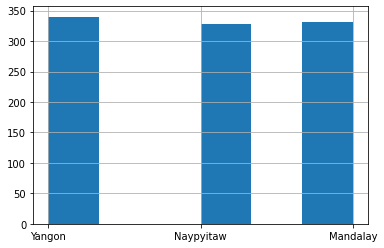

In [11]:
# Frequency distribution for "City"
sales_qual_df['City'].hist(bins=6)

### Exploring "Product line"

In [16]:
# Distribution for "Product line"
sales_qual_df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

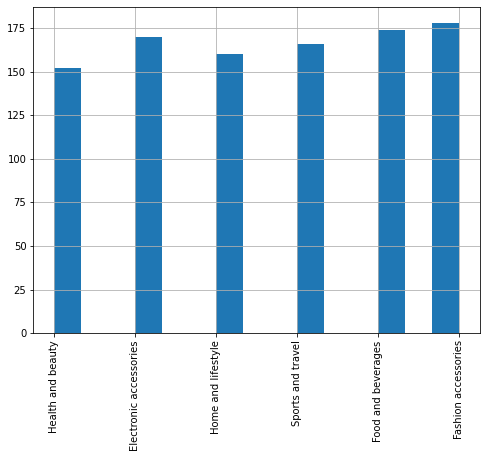

In [29]:
sales_qual_df['Product line'].hist(bins=15, figsize=(8,6))
plt.xticks(rotation='vertical')
plt.show()

In [39]:
# Distribution of "Fashion acccesories" by "Gender"

# sales_qual_df['Gender'].value_counts()

filter = sales_qual_df['Product line'] == 'Fashion accessories'

pivot_table = pd.pivot_table(sales_qual_df[filter], index=['Product line', 'Gender'], aggfunc='size')
pivot_table

Product line         Gender
Fashion accessories  Female    96
                     Male      82
dtype: int64

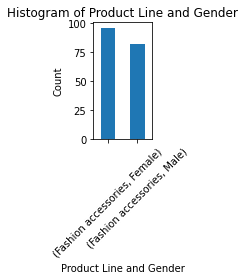

In [47]:
pivot_table.plot(kind='bar', figsize=(2, 4))
plt.title('Histogram of Product Line and Gender')
plt.xlabel('Product Line and Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the histogram
plt.show()


In [50]:
# Distribution of "Fashion acccesories" by "City"
filter = sales_qual_df['Product line'] == 'Fashion accessories'

pivot_table = pd.pivot_table(sales_qual_df, index=[ 'City', 'Product line'], aggfunc='size')
pivot_table

City       Product line          
Mandalay   Electronic accessories    55
           Fashion accessories       62
           Food and beverages        50
           Health and beauty         53
           Home and lifestyle        50
           Sports and travel         62
Naypyitaw  Electronic accessories    55
           Fashion accessories       65
           Food and beverages        66
           Health and beauty         52
           Home and lifestyle        45
           Sports and travel         45
Yangon     Electronic accessories    60
           Fashion accessories       51
           Food and beverages        58
           Health and beauty         47
           Home and lifestyle        65
           Sports and travel         59
dtype: int64

### Exploring "Payment"

In [51]:
sales_qual_df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [52]:
filter = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Total', 'Quantity']
sales_qual_df = sales_df[filter]

In [59]:
sales_qual_df.groupby('Payment')['Total'].sum()

Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64

<AxesSubplot:xlabel='Payment'>

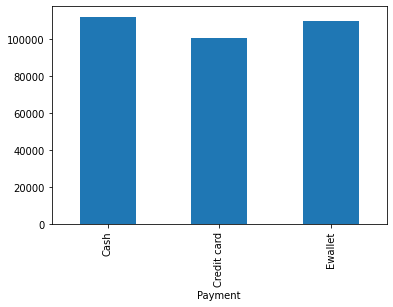

In [62]:
sales_qual_df.groupby('Payment')['Total'].sum().plot(kind='bar')